# test script to check if tracking works

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.signal import argrelmax
from os import listdir
from os.path import isfile, join
%matplotlib inline

# add additional path to import scripts used in gui
import sys
sys.path.append('C:/Users/Experiment/PycharmProjects/PythonLab')

import json

from time import localtime, strftime
# file = './2015-05-21_20-32-29-5.8e-4Torr_NoPinhole_R100k.csv'
# folder = './'
import functions.tracking as trk

dirpath = 'Z:/Lab/Cantilever/Measurements/150526_Silicon_nitride_with_1um_pads/TrackFocus_test'
# dirpath = './testdata/'
tag = 'Si3Ni4'

In [2]:
# define functions

# Define conversion functions between original and dual axes
# def pts_to_V_conv(x, Vmin, Vmax, pts):
#     '''
#     conversion between V and points
#     '''
#     return x / pts * (Vmax-Vmin) + Vmin





real shift x: 0.020
real shift y: 0.030
found shift x: 0.020
found shift y: 0.030


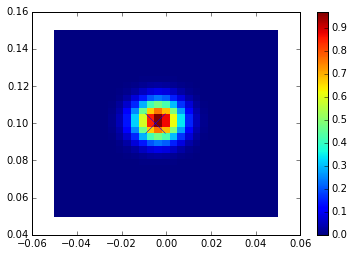

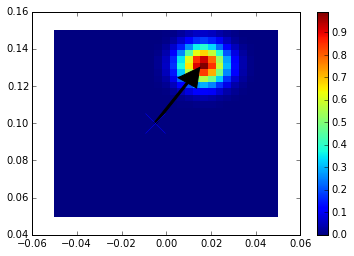

In [3]:
# ===============================================================
# make test data
# ===============================================================

rio = {
        "xo": -0.00, 'yo': 0.1,
        "dx": 0.1, 'dy': 0.1,
        'xPts': 30, 'yPts': 30
    }

xVmin, xVmax, xPts, yVmin, yVmax, yPts = trk.rio_to_galvoparameter(rio)

X, Y = np.meshgrid(np.linspace(xVmin, xVmax, xPts), np.linspace(yVmin, yVmax, yPts))

point_a = {
        "xo": -0.005, 'yo': 0.1,
        "sx": 0.01, 'sy': 0.01
    }

point_b = point_a.copy()

point_b['xo'] += 0.02 
point_b['yo'] += 0.03 

img_a = np.exp(-(X-point_a['xo'])**2. / point_a['sx']**2) * np.exp(-(Y-point_a['yo'])**2. / point_a['sy']**2)
img_b = np.exp(-(X-point_b['xo'])**2. / point_b['sx']**2) * np.exp(-(Y-point_b['yo'])**2. / point_b['sy']**2)

# ===============================================================
# run script
# ===============================================================
rio_new = trk.find_beam_position(img_a, img_b, rio)

print 'real shift x: {:0.03f}'.format(point_b['xo'] - point_a['xo'])
print 'real shift y: {:0.03f}'.format(point_b['yo'] - point_a['yo'])

print 'found shift x: {:0.03f}'.format(rio_new['xo'] - rio['xo'])
print 'found shift y: {:0.03f}'.format(rio_new['yo'] - rio['yo'])

# ===============================================================
# plot
# ===============================================================
plt.pcolor(X, Y, img_a)
plt.colorbar()
plt.plot(point_a['xo'], point_a['yo'], 'x' , ms = 20)

plt.figure()
plt.pcolor(X, Y, img_b)
plt.colorbar()
plt.plot(point_a['xo'], point_a['yo'], 'x' , ms = 20)
plt.axes().arrow(point_a['xo'], point_a['yo'], rio_new['xo'] - rio['xo'],rio_new['yo'] - rio['yo'], head_width=0.01, head_length=0.01, fc='k', ec='k', length_includes_head=True)

# plt.figure()
# plt.pcolor(X, Y, img_b-img_a)
# plt.colorbar()

# plt.figure()
# cor = signal.correlate2d (img_a, img_b, mode='same')
# plt.pcolor(X, Y,  cor)
# plt.colorbar()
# plt.plot(point_a['xo'], point_a['yo'], 'x' , ms = 20)

# plt.figure()
# cor = signal.correlate2d (img_a, img_a, mode='same')
# plt.pcolor(X, Y,  cor)
# plt.colorbar()
# plt.plot(point_a['xo'], point_a['yo'], 'x' , ms = 20)



In [4]:
print rio
print rio_new

{'xPts': 30, 'xo': -0.0, 'yo': 0.1, 'dx': 0.1, 'dy': 0.1, 'yPts': 30}
{'xPts': 30, 'xo': 0.020000000000000004, 'yo': 0.13, 'dy': 0.1, 'yPts': 30, 'dx': 0.1}


# OLD STUFF

In [52]:
# load images

filename_a = '2015-06-01_17-06-04_Si3Ni4_RIO_000'
filename_b = '2015-06-01_17-07-01_Si3Ni4_RIO_000'
filename_b = '2015-06-01_17-30-14_Si3Ni4_RIO_000'


img_a = np.loadtxt('{:s}/{:s}.csv'.format(dirpath, filename_a),  delimiter=',')
img_b = np.loadtxt('{:s}/{:s}.csv'.format(dirpath, filename_b),  delimiter=',')

with open('{:s}/{:s}.rio'.format(dirpath, filename_a), 'r') as rio_file:
    rio_a = json.loads(rio_file.read())
    
with open('{:s}/{:s}.rio'.format(dirpath, filename_b), 'r') as rio_file:
    rio_b = json.loads(rio_file.read()) 

# dx, dy = find_beam_position(img_a, img_a)
# print 'offset (should be (0,0))'
# print dx, dy


# dx, dy = find_beam_position(img_a, img_b)
# print 'offset (should be (0,0))'
# print dx, dy

14 14
0 0


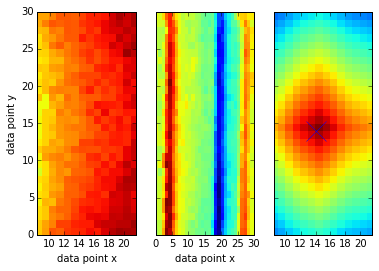

In [71]:




cor = signal.correlate2d (img_a, img_b, mode='same')
max_y, max_x = np.unravel_index(np.argmax(cor),cor.shape)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

p = ax1.pcolor(img_b)
ax1.set_aspect(yPts/xPts)
ax1.set_xlabel('data point x', fontsize=10)
ax1.set_ylabel('data point y', fontsize=10)


p = ax2.pcolor(img_a-img_b)
ax1.set_aspect(yPts/xPts)
ax2.set_xlabel('data point x', fontsize=10)
# ax1.set_xaxis.tick_bottom()
# ax1.set_xaxis.tick_left()





print initial_max_y, initial_max_x
print shift_x, shift_y

p = ax3.pcolor( cor)
ax3.plot(max_x, max_y, 'x' , ms = 20)
ax3.set_aspect(1.*cor.shape[0]/cor.shape[1])
# ax3.arrow(initial_max_x, initial_max_y, shift_x,shift_y, head_width=2, head_length=1, fc='k', ec='k', length_includes_head=True)
# ax3.set_xlabel('data point x', fontsize=10)
# ax2.set_xlabel('data point x', fontsize=10)
# # ax2.set_xaxis.tick_bottom()
# # axis([0, cor.shape[0], 0, cor.shape[1]])
# # top X-AXIS properties
# ay2 = plt.twiny()
# ay2.set_xlabel('Galvo y (Volt)', fontsize=10)
# ay2.xaxis.tick_top()
# ay2.yaxis.tick_right()
# ay2.axis([xmin2, xmax2, ymin2, ymax2])





# BEGIN DUAL UNITS  AXES CODE ==========


# xmin2 = pts_to_V_conv(0, rio_xVmin, rio_xVmax, rio_xPts)
# xmax2 = pts_to_V_conv(rio_xPts, rio_xVmin, rio_xVmax, rio_xPts)
# ymin2 = pts_to_V_conv(0, rio_yVmin, rio_yVmax, rio_yPts)
# ymax2 = pts_to_V_conv(rio_yPts, rio_yVmin, rio_yVmax, rio_yPts)


# # right Y-AXIS properties
# ax3u = ax3.twinx()
# ax3u.set_ylabel('Galvo x (Volt)', fontsize=10)
# ax3u.yaxis.tick_right()
# ax3u.axis([0, rio_xPts, ymin2, ymax2])
# # top X-AXIS properties
# ax1l = ax1.twiny()
# ax1l.set_xlabel('Galvo y (Volt)', fontsize=10)
# ax1l.xaxis.tick_top()
# ax1l.yaxis.tick_right()
# ax1l.axis([xmin2, xmax2, ymin2, ymax2])

# ax2l = ax2.twiny()
# ax2l.set_xlabel('Galvo y (Volt)', fontsize=10)
# ax2l.xaxis.tick_top()
# ax2l.yaxis.tick_right()
# ax2l.axis([xmin2, xmax2, ymin2, ymax2])

# ax3l = ax3.twiny()
# ax3l.set_xlabel('Galvo y (Volt)', fontsize=10)
# ax3l.xaxis.tick_top()
# ax3l.yaxis.tick_right()
# ax3l.axis([xmin2, xmax2, ymin2, ymax2])



# ax1.set_xlim([0, rio_xPts])
# ax1.set_ylim([0, rio_yPts])

# ax1.set_xlim([0, rio_xPts])
# ax1.set_ylim([0, rio_yPts])

# ax3.set_xlim([0, rio_xPts])
# ax3.set_ylim([0, rio_yPts])
